# Описание проекта
## Задача
Проаналищировать данные развлекательного приложения, которое, несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки, разобраться в причинах и помочь выйти в плюс.
## Цели исследования
- Изучить, откуда приходят пользователи и какими устройствами они пользуются.
- Проверить, сколько стоит привлечение пользователей из различных рекламных каналов.
- Оценить, сколько денег приносит каждый клиент.
- Понять, когда расходы на привлечение клиента окупаются.
- Выяснить, какие факторы мешают привлечению клиентов.

## Ход исследования
1. Загрузка, обзор и предобработка данных.
2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.
3. Исследовательский анализ данных.
4. Маркетинговый анализ данных.
5. Анализ окупаемости рекламы.
6. Выводы.

# 1. Загрузка, обзор и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [2]:
# Загружаем данные
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
# Зададим змеиный регистр и заменим пробелы в названиях столбцов
for name, df in [('visits', visits), ('orders', orders), ('costs', costs)]:
    df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
    print(f'Датафрейм {name}: {list(df.columns)}')
    print()

Датафрейм visits: ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

Датафрейм orders: ['user_id', 'event_dt', 'revenue']

Датафрейм costs: ['dt', 'channel', 'costs']



In [10]:
# Приведём столбцы со значениями даты и времени к типу datetime
for df in visits, orders, costs:
    for column in 'session_start', 'session_end', 'event_dt', 'dt':
        if column in df:
            if df is not costs and column != 'dt':
                df[column] = pd.to_datetime(df[column])
            else:
                df[column] = pd.to_datetime(df[column]).dt.date

In [11]:
# Проверяем, преобразовались ли данные
for df in visits, orders, costs:
    df.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942

In [12]:
# Проверим размерность датасетов
for name, df in ('visits', visits), ('orders', orders), ('costs', costs):
    print(f'Датафрейм {name}')
    print(f'Размер (количество строк, количество столбцов):', df.shape)
    print(f'Столбцы:', df.columns.tolist())
    print()

Датафрейм visits
Размер (количество строк, количество столбцов): (309901, 6)
Столбцы: ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

Датафрейм orders
Размер (количество строк, количество столбцов): (40212, 3)
Столбцы: ['user_id', 'event_dt', 'revenue']

Датафрейм costs
Размер (количество строк, количество столбцов): (1800, 3)
Столбцы: ['dt', 'channel', 'costs']



In [13]:
# Проверим пропуски
for name, df in ('visits', visits), ('orders', orders), ('costs', costs):
    print(f'Датафрейм {name}')
    print(df.isna().sum())
    print()

Датафрейм visits
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Датафрейм orders
user_id     0
event_dt    0
revenue     0
dtype: int64

Датафрейм costs
dt         0
channel    0
costs      0
dtype: int64



In [14]:
# Проверим датасеты на наличие явных дубликатов
for name, df in ('visits', visits), ('orders', orders), ('costs', costs):
    print(f'Количество явных дубликатов в {name}: {df.duplicated().sum()}')
    print()

Количество явных дубликатов в visits: 0

Количество явных дубликатов в orders: 0

Количество явных дубликатов в costs: 0



In [15]:
# Проверим наличие неявных дубликатов в интересующих нас местах
print(f"visits['region']\n{visits['region'].unique()}")
print()
print(f"visits['device']\n{visits['device'].unique()}")
print()
print(f"visits['channel']\n{visits['channel'].unique()}")

visits['region']
['United States' 'UK' 'France' 'Germany']

visits['device']
['iPhone' 'Mac' 'Android' 'PC']

visits['channel']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [16]:
for df in visits, orders, costs:
    print(df.columns.tolist())
    print()

['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

['user_id', 'event_dt', 'revenue']

['dt', 'channel', 'costs']



# 2. Функции для расчёта и анализа LTV, ROI, удержания и конверсии

## Функция для создания пользовательских профилей

In [17]:
def get_profiles(sessions, orders, ad_costs):
    # Находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # Для когортного анализа определяем дату первого посещения
    # И первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # Добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # Считаем количество уникальных пользователей
    # С одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # Объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # Делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # Добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # Стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

## Функция для расчёта удержания

In [18]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):

    # Добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # Исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # Функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция для расчёта конверсии

In [19]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):

    # Исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # Группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # Функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Делим каждую «ячейку» в строке на размер когорты
        # И получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # Получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция для расчёта LTV и ROI

In [20]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):

    # Исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # Добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # Рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # Группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # Функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # Строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # Находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # Вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # Объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # Исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # Восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # Собираем датафрейм с данными пользователей и значениями CAC, 
        # Добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # Считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # Считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # Удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # Восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # Добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # В финальной таблице оставляем размеры когорт, CAC
        # И ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # Возвращаем таблицы LTV и ROI
        return result, roi

    # Получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # Для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # Получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # Сырые данные
        result_grouped,  # Таблица LTV
        result_in_time,  # Таблица динамики LTV
        roi_grouped,  # Таблица ROI
        roi_in_time,  # Таблица динамики ROI
    )

## Функция для сглаживания фрейма

In [21]:
def filter_data(df, window):
    # Для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

## Функция для визуализации удержания

In [22]:
def plot_retention(retention, retention_history, horizon, window=7):

    # Задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # Исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # В таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # Если в индексах таблицы удержания только payer,
    # Добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # В таблице графиков — два столбца и две строки, четыре ячейки
    # В первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # Во второй ячейке строим кривые удержания неплатящих
    # Вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)

    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # В третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # Получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # Фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # В чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # Фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

## Функция для визуализации конверсии

In [23]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # Задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # Исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # В таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # Первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # Второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # Столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Функция для визуализации LTV и ROI

In [24]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    
    # Задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # Из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # В таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # Стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # Из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # В таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # Первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # Второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # Столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # Третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # Столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # Четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # Пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # Столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# 3. Исследовательский анализ данных

In [25]:
# Получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [26]:
# Приводим к типу datetime
profiles['dt'] = pd.to_datetime(profiles['dt'])

profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  datetime64[ns]
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [27]:
# Определим минимальную и максимальную даты привлечения пользователей
print(f"Минимальная дата привлечения пользователей: {profiles['first_ts'].min()}")
print()
print(f"Максимальная дата привлечения пользователей: {profiles['first_ts'].max()}")

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41

Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


In [28]:
# Напишем функцию, чтобы построить таблицы, отражающие количество пользователей и долю платящих по заданному критерию

def grouped_table(criteria):
    grouped = (
        profiles
        .groupby(criteria)
        .agg(total_users=('user_id', 'nunique'),
             paying_users=('payer', 'sum'))
        .reset_index()
    )

    grouped['payers_ratio'] = grouped['paying_users'] / grouped['total_users']

    print(
        grouped.sort_values(by=['total_users', 'paying_users', 'payers_ratio'], ascending=False).reset_index(drop='True')
    )

In [29]:
# Используем её
for c in 'region', 'device', 'channel':
    grouped_table(c)
    print()

          region  total_users  paying_users  payers_ratio
0  United States       100002          6902      0.069019
1             UK        17575           700      0.039829
2         France        17450           663      0.037994
3        Germany        14981           616      0.041119

    device  total_users  paying_users  payers_ratio
0   iPhone        54479          3382      0.062079
1  Android        35032          2050      0.058518
2       PC        30455          1537      0.050468
3      Mac        30042          1912      0.063644

               channel  total_users  paying_users  payers_ratio
0              organic        56439          1160      0.020553
1             FaceBoom        29144          3557      0.122049
2               TipTop        19561          1878      0.096007
3   OppleCreativeMedia         8605           233      0.027077
4       WahooNetBanner         8553           453      0.052964
5              LeapBob         8553           262      0.030633


In [30]:
# Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны
region_grouped = (
    profiles
    .groupby('region')
    .agg(total_users=('user_id', 'nunique'),
         paying_users=('payer', 'sum'))
    .reset_index()
)

region_grouped['payers_ratio'] = region_grouped['paying_users'] / region_grouped['total_users']

print(
    region_grouped.sort_values(by=['total_users', 'paying_users', 'payers_ratio'], ascending=False).reset_index(drop='True')
)

          region  total_users  paying_users  payers_ratio
0  United States       100002          6902      0.069019
1             UK        17575           700      0.039829
2         France        17450           663      0.037994
3        Germany        14981           616      0.041119


Большая часть пользователей приходит из США. Как и большая часть платящих пользователей.

In [31]:
# Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства
device_grouped = (
    profiles
    .groupby('device')
    .agg(total_users=('user_id', 'nunique'),
         paying_users=('payer', 'sum'),)
    .reset_index()
)

device_grouped['payers_ratio'] = device_grouped['paying_users'] / device_grouped['total_users']

print(
    device_grouped.sort_values(by=['total_users', 'paying_users', 'payers_ratio'], ascending=False).reset_index(drop='True')
)

    device  total_users  paying_users  payers_ratio
0   iPhone        54479          3382      0.062079
1  Android        35032          2050      0.058518
2       PC        30455          1537      0.050468
3      Mac        30042          1912      0.063644


На первом месте по общему количеству как всех, так и платящих пользователей iPhone. В долевом отношении его немного превосходит Mac.

In [32]:
# Напишем функцию, чтобы посмотреть на распределение пользовательских устройств по странам, а также для других сочетаний.
def distribution_func(criteria, distribution):
    for elem in profiles[criteria].unique():
        print(elem)
        print(profiles.loc[profiles[criteria] == elem, distribution].value_counts())
        print()

In [33]:
distribution_func('region', 'channel')

United States
organic           38173
FaceBoom          29144
TipTop            19561
RocketSuperAds     4448
MediaTornado       4364
YRabbit            4312
Name: channel, dtype: int64

France
organic               6392
OppleCreativeMedia    2991
LeapBob               2988
WahooNetBanner        2971
AdNonSense            1366
lambdaMediaAds         742
Name: channel, dtype: int64

Germany
organic               5453
WahooNetBanner        2579
OppleCreativeMedia    2562
LeapBob               2519
AdNonSense            1219
lambdaMediaAds         649
Name: channel, dtype: int64

UK
organic               6421
OppleCreativeMedia    3052
LeapBob               3046
WahooNetBanner        3003
AdNonSense            1295
lambdaMediaAds         758
Name: channel, dtype: int64



Рекламные каналы FaceBoom и TipTop используются только в США.

In [34]:
distribution_func('device', 'channel')

Mac
organic               11349
FaceBoom               7265
TipTop                 4820
RocketSuperAds         1137
MediaTornado           1105
YRabbit                1097
OppleCreativeMedia      882
LeapBob                 880
WahooNetBanner          856
AdNonSense              410
lambdaMediaAds          241
Name: channel, dtype: int64

iPhone
organic               20597
FaceBoom              12996
TipTop                 8840
MediaTornado           1927
RocketSuperAds         1917
YRabbit                1868
WahooNetBanner         1711
OppleCreativeMedia     1701
LeapBob                1691
AdNonSense              798
lambdaMediaAds          433
Name: channel, dtype: int64

PC
organic               11302
OppleCreativeMedia     3496
WahooNetBanner         3409
LeapBob                3402
FaceBoom               3008
TipTop                 2012
AdNonSense             1563
lambdaMediaAds          862
YRabbit                 482
RocketSuperAds          466
MediaTornado            453
Name

FaceBoom и TipTop приводят пользователей всех устройств.

In [35]:
distribution_func('channel', 'device')

FaceBoom
iPhone     12996
Mac         7265
Android     5875
PC          3008
Name: device, dtype: int64

organic
iPhone     20597
Android    13191
Mac        11349
PC         11302
Name: device, dtype: int64

AdNonSense
PC         1563
Android    1109
iPhone      798
Mac         410
Name: device, dtype: int64

YRabbit
iPhone     1868
Mac        1097
Android     865
PC          482
Name: device, dtype: int64

MediaTornado
iPhone     1927
Mac        1105
Android     879
PC          453
Name: device, dtype: int64

RocketSuperAds
iPhone     1917
Mac        1137
Android     928
PC          466
Name: device, dtype: int64

LeapBob
PC         3402
Android    2580
iPhone     1691
Mac         880
Name: device, dtype: int64

TipTop
iPhone     8840
Mac        4820
Android    3889
PC         2012
Name: device, dtype: int64

WahooNetBanner
PC         3409
Android    2577
iPhone     1711
Mac         856
Name: device, dtype: int64

OppleCreativeMedia
PC         3496
Android    2526
iPhone     1701
Mac

В этих рекламных каналах доминируют Mac и iPhone.

In [36]:
distribution_func('channel', 'region')

FaceBoom
United States    29144
Name: region, dtype: int64

organic
United States    38173
UK                6421
France            6392
Germany           5453
Name: region, dtype: int64

AdNonSense
France     1366
UK         1295
Germany    1219
Name: region, dtype: int64

YRabbit
United States    4312
Name: region, dtype: int64

MediaTornado
United States    4364
Name: region, dtype: int64

RocketSuperAds
United States    4448
Name: region, dtype: int64

LeapBob
UK         3046
France     2988
Germany    2519
Name: region, dtype: int64

TipTop
United States    19561
Name: region, dtype: int64

WahooNetBanner
UK         3003
France     2971
Germany    2579
Name: region, dtype: int64

OppleCreativeMedia
UK         3052
France     2991
Germany    2562
Name: region, dtype: int64

lambdaMediaAds
UK         758
France     742
Germany    649
Name: region, dtype: int64



Видно, что каналы по странам сильно различаются.

In [37]:
# Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения
channel_grouped = (
    profiles
    .groupby('channel')
    .agg(total_users=('user_id', 'nunique'),
         paying_users=('payer', 'sum'),)
    .reset_index()
)

channel_grouped['payers_ratio'] = channel_grouped['paying_users'] / channel_grouped['total_users']

print(
    channel_grouped.sort_values(by=['total_users', 'paying_users', 'payers_ratio'], ascending=False).reset_index(drop='True')
)

               channel  total_users  paying_users  payers_ratio
0              organic        56439          1160      0.020553
1             FaceBoom        29144          3557      0.122049
2               TipTop        19561          1878      0.096007
3   OppleCreativeMedia         8605           233      0.027077
4       WahooNetBanner         8553           453      0.052964
5              LeapBob         8553           262      0.030633
6       RocketSuperAds         4448           352      0.079137
7         MediaTornado         4364           156      0.035747
8              YRabbit         4312           165      0.038265
9           AdNonSense         3880           440      0.113402
10      lambdaMediaAds         2149           225      0.104700


Больше всего платящих пользователей и в количественном отношении, и в долевом пришло из FaceBoom.

# 4. Маркетинг

In [38]:
# Посчитаем общую сумму расходов на маркетинг
print(f"Расходы на маркетинг: {profiles['acquisition_cost'].sum()}")

Расходы на маркетинг: 105497.29999999999


In [39]:
# Посмотрим, как траты распределены по рекламным источникам
print(
    profiles
    .groupby('channel')
    .agg({'acquisition_cost': 'sum'})
    .reset_index()
    .sort_values(by='acquisition_cost', ascending=False)
    .reset_index(drop='True')
)

               channel  acquisition_cost
0               TipTop          54751.30
1             FaceBoom          32445.60
2       WahooNetBanner           5151.00
3           AdNonSense           3911.25
4   OppleCreativeMedia           2151.25
5       RocketSuperAds           1833.00
6              LeapBob           1797.60
7       lambdaMediaAds           1557.60
8         MediaTornado            954.48
9              YRabbit            944.22
10             organic              0.00


Главный источник рекламных расходов — TipTop. При этом по эффективности он уступает FaceBoom.

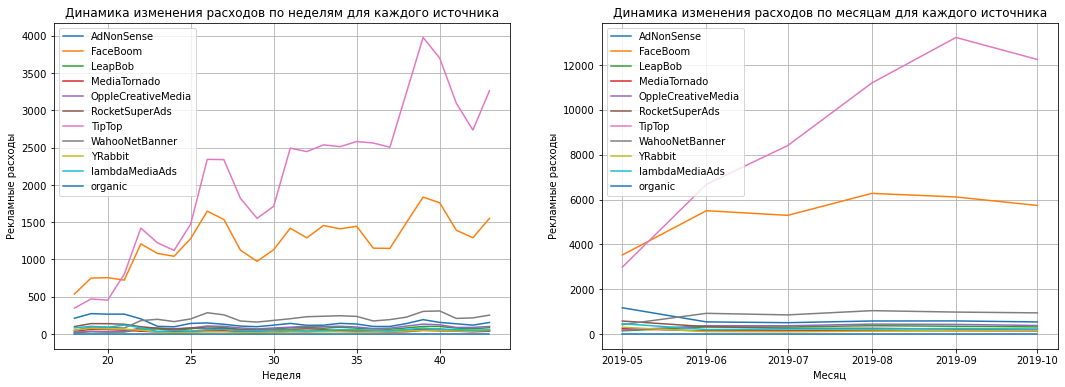

In [40]:
# Создаём столбец week
profiles['week'] = profiles['dt'].dt.isocalendar().week

# Построим график по неделям, суммируя расходы по каждому источнику
costs_by_week_and_channel = (
    profiles
    .groupby(['week', 'channel'])
    .agg({'acquisition_cost': 'sum'})
    .reset_index()
)

# Создаём сводную таблицу для построения графика
costs_pivot_week = (
    costs_by_week_and_channel
    .pivot_table(index='week', columns='channel', values='acquisition_cost')
)

# Строим график по месяцам
costs_by_month_and_channel = (
    profiles
    .groupby(['month', 'channel'])
    .agg({'acquisition_cost': 'sum'})
    .reset_index()
)

# Так же создаём сводную таблицу
costs_pivot_month = (
    costs_by_month_and_channel
    .pivot_table(index='month', columns='channel', values='acquisition_cost')
)

# Строим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

for channel in costs_pivot_week.columns:
    ax1.plot(costs_pivot_week.index, costs_pivot_week[channel], label=channel)

ax1.set_xlabel('Неделя')
ax1.set_ylabel('Рекламные расходы')
ax1.set_title('Динамика изменения расходов по неделям для каждого источника')
ax1.legend()
ax1.grid(True)

for channel in costs_pivot_month.columns:
    ax2.plot(costs_pivot_month.index, costs_pivot_month[channel], label=channel)

ax2.set_xlabel('Месяц')
ax2.set_ylabel('Рекламные расходы')
ax2.set_title('Динамика изменения расходов по месяцам для каждого источника')
ax2.legend()
ax2.grid(True)

plt.show()

Расходы на более эффективный FaceBoom распределены по времени более стабильно, чем на TipTop. При это видно, что расходы стабильно увеличивались, достигнув пика в сентябре.

In [41]:
# Сумма расходов на каждый источник
costs_by_channel = (
    profiles.groupby('channel').agg({'acquisition_cost': 'sum'})
)

# Количество уникальных пользователей из каждого источника
users_by_channel = (
    profiles.groupby('channel').agg({'user_id': 'nunique'})
)

# Вычисление CAC для каждого источника
cac_by_channel = costs_by_channel ['acquisition_cost'] / users_by_channel['user_id']

print(cac_by_channel.sort_values(ascending=False))

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
dtype: float64


Привлечение одного пользователя (CAC) из TipTop также оказалось самым дорогостоящим — примерно в два с половиной раза дороже, чем в FaceBoom.

Очевидно, расходы на TipTop стоит оптимизировать. От дорогостоящего источника довольно слабая отдача.

## 5. Окупаемость рекламы

In [42]:
# Задаём момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [43]:
# Отфильтруем органических пользователей
paid_users = profiles.loc[profiles['channel'] != 'organic']

In [44]:
paid_users

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,19
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,28
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,34
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,40
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000,26
...,...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000,21
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838,33
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000,39
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000,30


In [45]:
# Считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_users, orders, observation_date, horizon_days
)

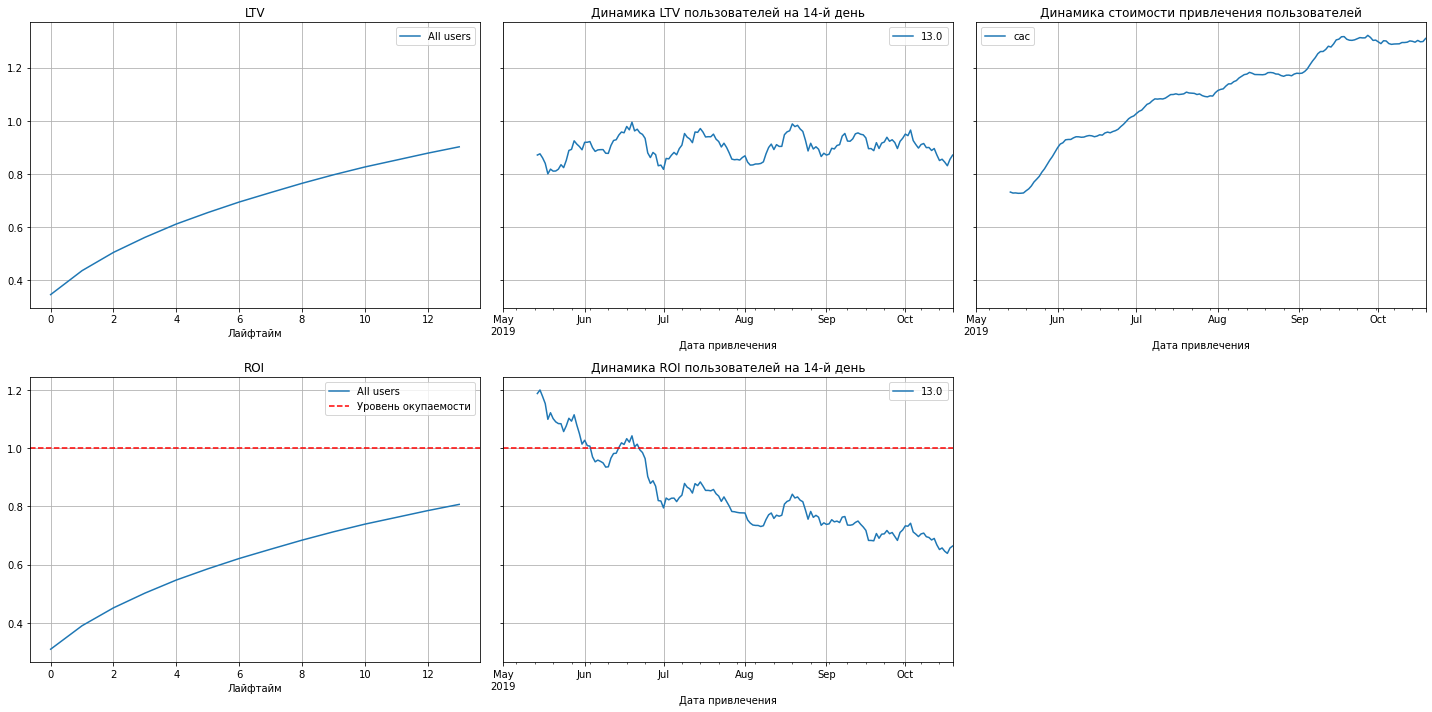

In [46]:
# Посмотрим на окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14 # Установим окно в 14 дней, чтобы сгладить фрейм
)

По графикам LTV, CAC и ROI можно сделать следующие выводы:
- Реклама не окупается совсем.
- CAC стабильно растёт. Стоимость привлечения пользователей увеличивается, линия на графике немного напоминает линию расходов на TipTop. Можно говорить о влиянии увеличившегося рекламного бюджета.
- LTV стабилен, но не успевает за динамикой CAC.

In [47]:
# Определим максимальную дату привлечения пользователей
max_acquisition_date = roi_history.reset_index()['dt'].max()
print(max_acquisition_date)

2019-10-19 00:00:00


In [48]:
# Сравним расходы на привлечение в таблице ROI и расходах на рекламу
print(
    'Общие расходы на привлечение из таблицы ROI: {:.2f}'.format(
        roi_grouped.loc['All users', 'cac'] * roi_grouped.loc['All users', 'cohort_size']
    )
)

print(
    'Общие расходы на привлечение из таблицы расходов на рекламу: {:.2f}'.format(
        costs.query('dt <= @max_acquisition_date')['costs'].sum()
    )
)

Общие расходы на привлечение из таблицы ROI: 99085.74
Общие расходы на привлечение из таблицы расходов на рекламу: 99085.74


/Users/viktor_borodulya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


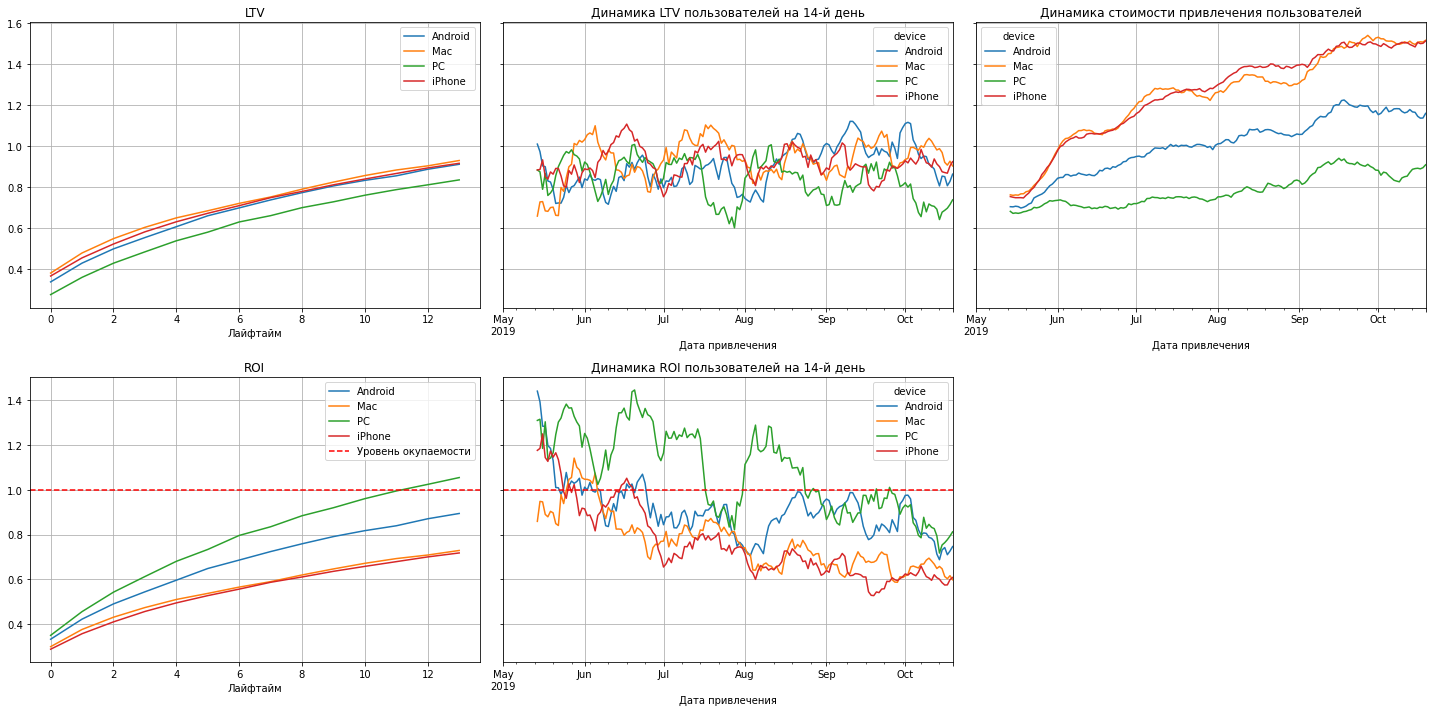

In [49]:
# Посмотрим на окупаемость рекламы с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_users, orders, observation_date, horizon_days, dimensions=['device']
)

# Установим окно в 14 дней, чтобы сгладить фрейм
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Что мы видим на графиках с разбивкой по устройствм:
- К концу второй недели реклама не окупается везде, кроме PC.
- Динамика окупаемости пользователей на 14-й день к концу наблюдаемого периода показывает устойчивую тенденцию к снижению для всех платформ.
- Стоимость привлечения демонстрирует обратное — она растёт весь наблюдаемый период для всех платформ. Особенно для iPhone и Mac.
- LTV стабилен, однако не достигает уровня CAC, в частности из-за более высокой динамики стоимости привлечения.
- Окупается только PC, девайсы Apple — в аутсайдерах.

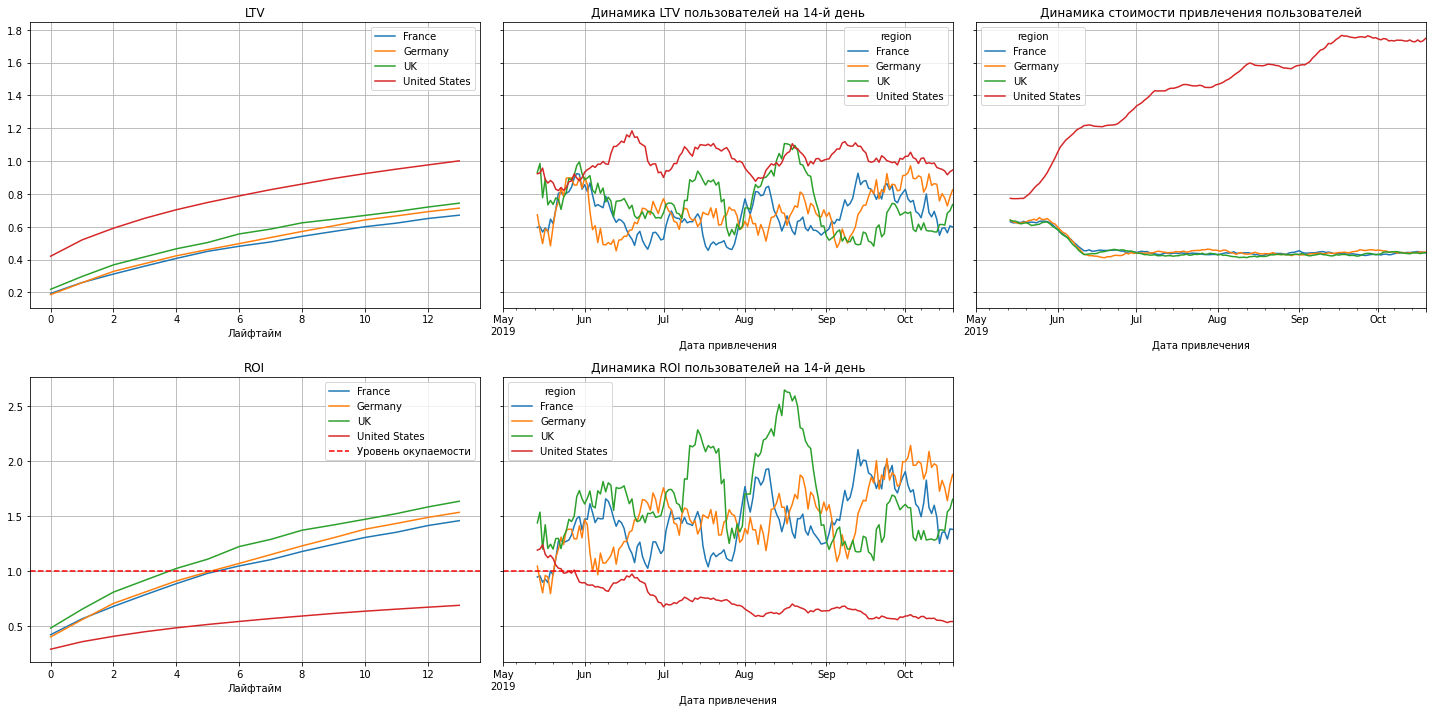

In [50]:
# Посмотрим на окупаемость рекламы с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_users, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По странам:
- Реклама хорошо окупается везде, кроме США. Там она не окупается вообще.
- Стоимость привлечения для всех стран после небольшого увеличения в июне стабильна, кроме США. Там расходы только растут.
- LTV стабилен.
- С незначительным преимуществом лучше всех окупается Великобритания.

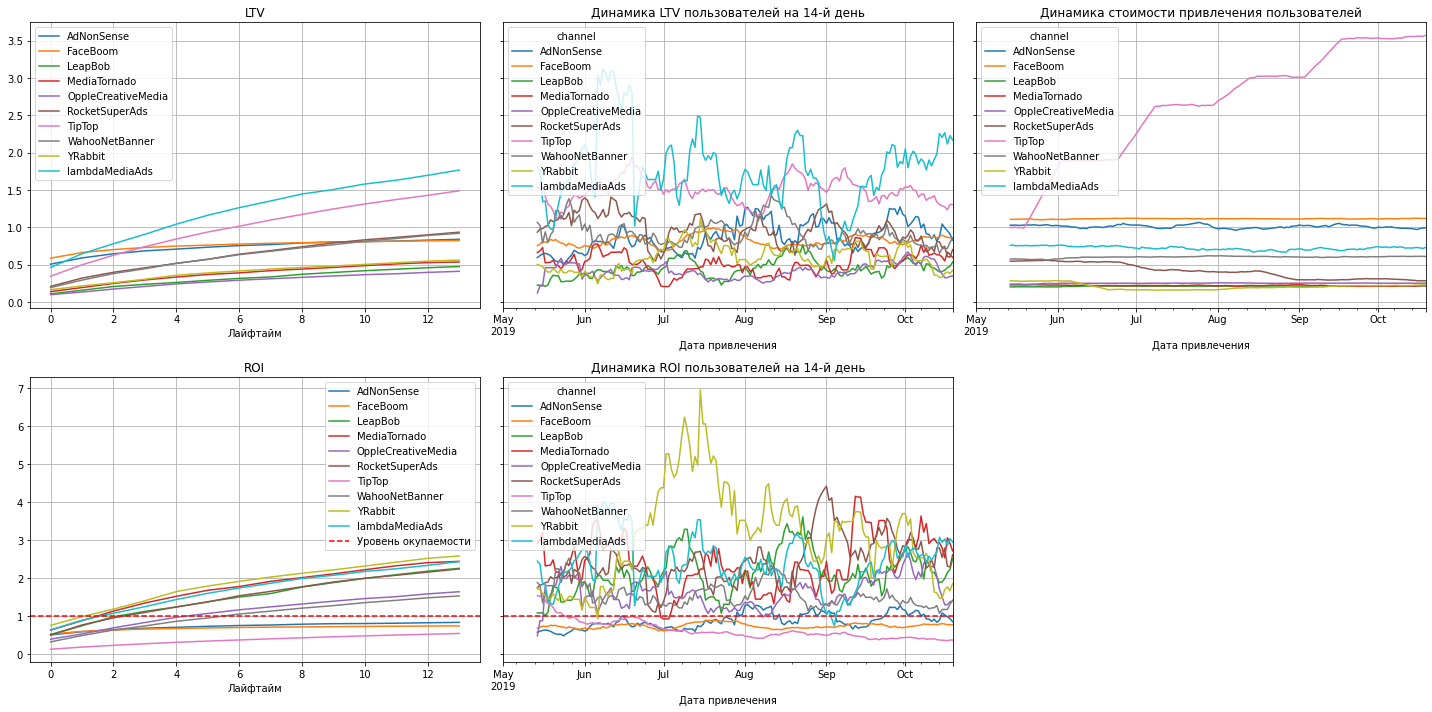

In [51]:
# Посмотрим на окупаемость рекламы с разбивкой по рекламным каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_users, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По рекламным каналам:
- Окупаются все каналы, кроме TipTop, FaceBoom и AdNonSense.
- Стоимость привлечения везде, кроме TipTop, стабильна.
- LTV стабилен.
- Лучшие по окупаемости YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds и LeapBob. Также у этих каналов отличный CAC. При этом их окупаемость достигает 250%.

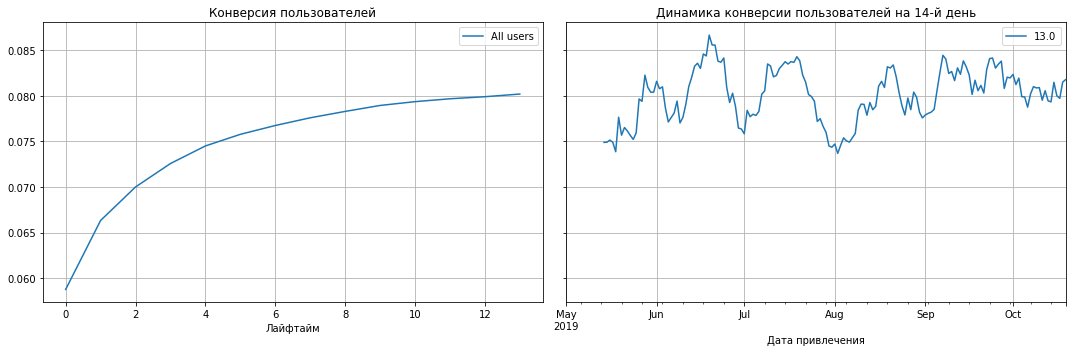

In [52]:
# Проверим конверсию пользователей и динамику её изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_users, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Несмотря на влияние сезона, пользователи хорошо конвертируются.

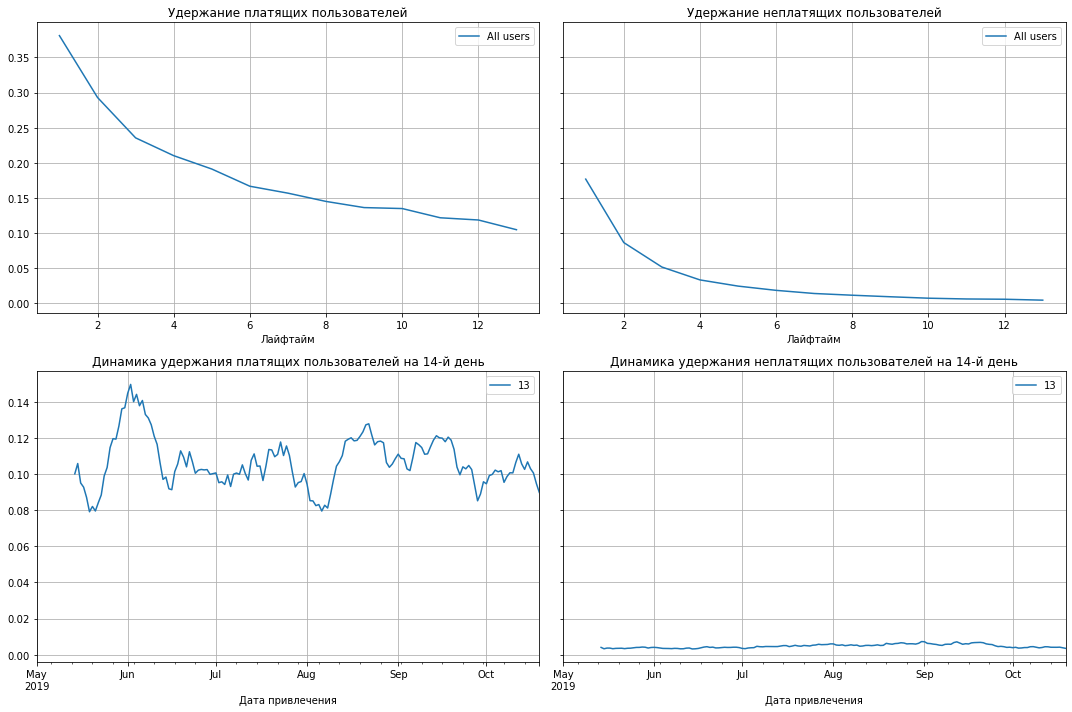

In [53]:
# То же сделаем с удержанием пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    paid_users, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)

Мы не знаем специфику бизнеса, поэтому стоит просто отметить относительно невысокий показатель удержания и его стабильность.

In [54]:
# Проверим, равна ли сумма размеров когорт числу новых клиентов в изучаемый период
report = paid_users.query(
    # В paid_users находим пользователей, привлечённых с 1 мая по 1 ноября
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 11, 1).date()'
)

print(
    # Считаем уникальных пользователей в paid_users и складываем размеры когорт из retention_grouped
    'Общее количество новых пользователей: {} {}'.format(
        len(report['user_id'].unique()), retention_grouped['cohort_size'].sum()
    )
)

# Проверим, равна ли сумма размеров платящих когорт числу покупателей в изучаемый период
report = paid_users.query(
    # В paid_users находим пользователей, привлечённых с 1 мая по 1 ноября
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 11, 1).date() and payer == True'
)

print(
    # Считаем уникальных платящих пользователей в paid_users
    # И складываем размеры платящих когорт из retention_grouped
    'Общее количество новых покупателей: {} {}'.format(
        len(report['user_id'].unique()),
        retention_grouped.query('payer == True')['cohort_size'].sum(),
    )
)

Общее количество новых пользователей: 93569 88644
Общее количество новых покупателей: 7721 7310


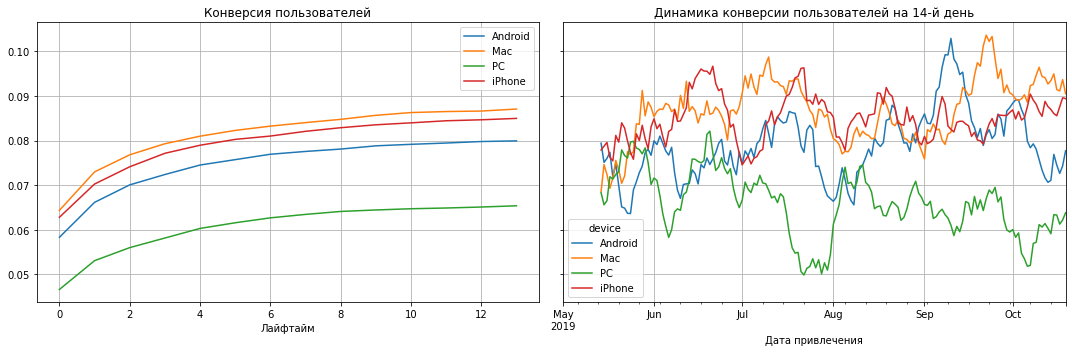

In [55]:
# Посмотрим на конверсию с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_users, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Пользователи всех устройств конвертируются хорошо. Mac и iPhone в лидерах, худшие показатели у PC.

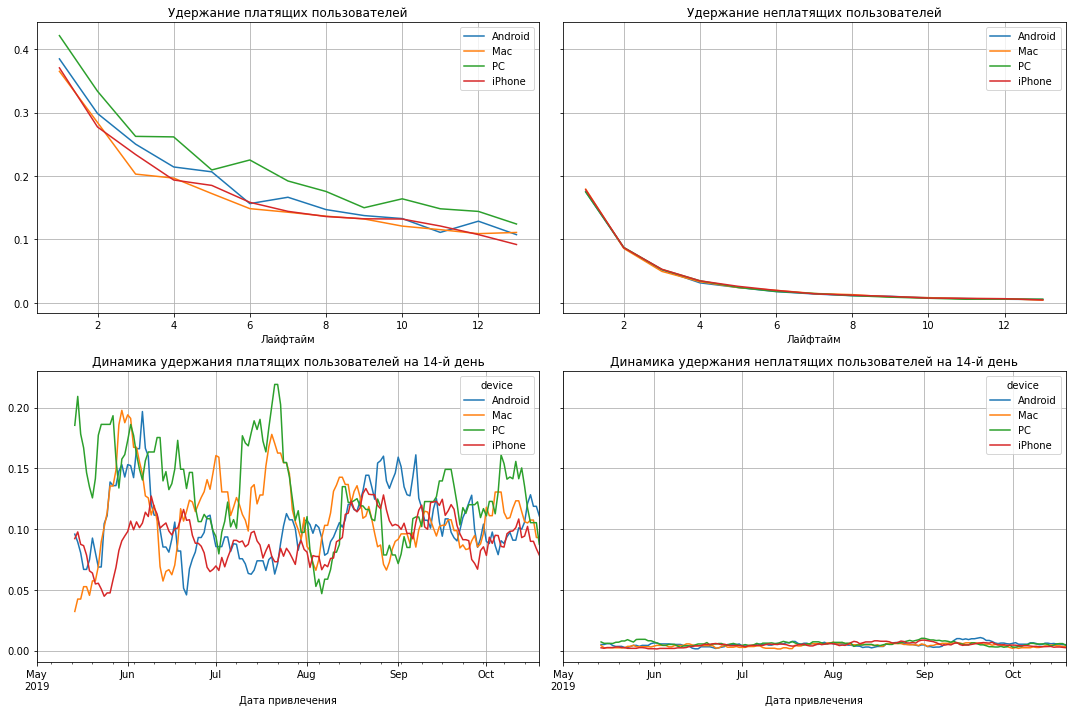

In [56]:
# И удержание
retention_raw, retention_grouped, retention_history = get_retention(
    paid_users, visits, observation_date, horizon_days, dimensions=['device']
)
plot_retention(retention_grouped, retention_history, horizon_days, window=14)

Удержание пользователей Mac и iPhone стабильно ниже, чем для остальных устройств, но аутсайдерами их назвать нельзя.

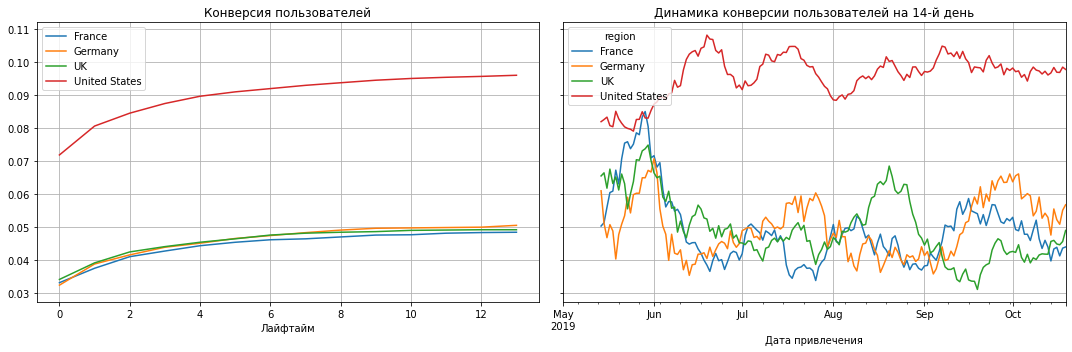

In [57]:
# С разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_users, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Пользователи из США конвертируются существенно лучше остальных.

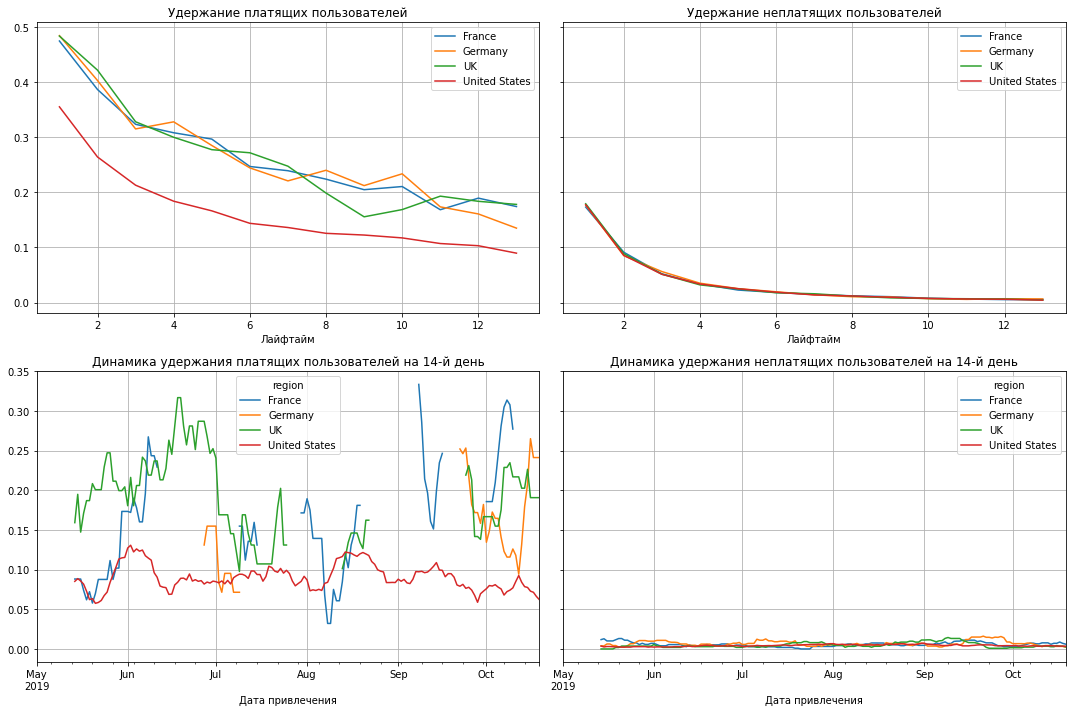

In [58]:
retention_raw, retention_grouped, retention_history = get_retention(
    paid_users, visits, observation_date, horizon_days, dimensions=['region']
)
plot_retention(retention_grouped, retention_history, horizon_days, window=14)

При этом у США худшие показатели удержания пользователей. Они стабильны.

Также мы видим, как все линии графика Динамики удержания платящих пользователей, кроме США, часто обрываются. Значит, часто удержание пользователей не из США на 14-й день было нулевым.

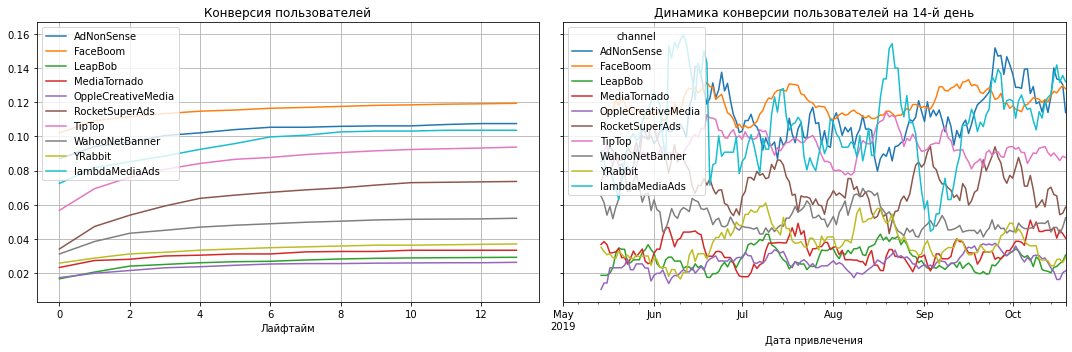

In [59]:
# Взглянем конверсию и удержание по рекламным каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_users, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Лучше всех конвертируются пользователи из FaceBoom.

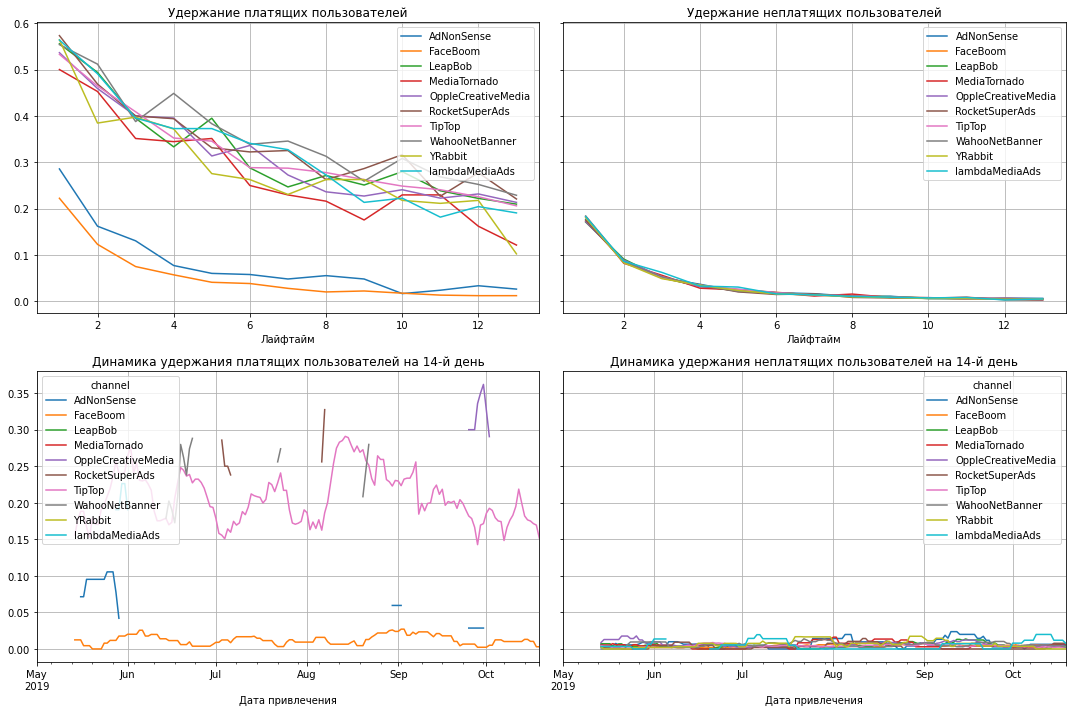

In [60]:
retention_raw, retention_grouped, retention_history = get_retention(
    paid_users, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention_grouped, retention_history, horizon_days, window=14)

При этом у них удержание хуже всех. Также крайне проблемным выглядит канал AdNonSense.

И здесь все линии графика динамики удержания платящих пользователей, кроме лидирующих рекламных каналов, обрываются. Таким образом, часто удержание пользователей не из лидирующих рекламных каналов на 14-й день было нулевым.

Но кажется, этому подвержены все каналы, кроме TipTop и FaceBoom. Возможно, это говорит о том, что рекламный бюджет расходовался неравномерно, большую часть времени перевес этих каналов в распределении рекламных средств был крайне огромным.

В целом реклама едва окупается. Но этому есть причины:
- Пользователи из США в отличие от остальных не окупаются.
- Привлечённые из каналов TipTop, FaceBoom и AdNonSense не приносят прибыли на 14 день «жизни».

Что может быть вызвано следующим:
- Пользователи из США не окупаются, имея при этом колоссальные по сравнению с другими группами пользователей затраты на привлечение в рекламных каналах FaceBoom и TipTop.
- В других странах выделяется канал AdNonSense, который также убыточен.

# 6. Выводы

Причины неэффективности привлечения пользователей:
- Привлечение пользователей из США обходится слишком дорого и не окупается. Расходы на привлечение в разы превышают остальные страны. При том что они самые многочисленные, а динамика расходов на них лишь возрастает.
- FaceBoom в США, несмотря на хорошие пользовательские показатели, финансово оказался убыточен из-за высоких расходов на привлечение.
- TipTop в Штатах также даёт лишь убытки. Как и AdNonSense в Европе. При этом FaceBoom и в особенности TipTop имеют куда более высокие расходы на привлечение пользователей, которые в разы выросли за наблюдаемый период.
- Самые успешные рекламные каналы YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds, LeapBob. Окупаемость первых трёх примерно 250%, двух последних — 200%.

Рекомендации для отдела маркетинга:

- Расходы на пользователей из США существенно выросли за это время, не демонстрируя при этом положительного бизнес-эффекта, что также наводит на мысль об эффективности рекламных источников. TipTop и FaceBoom убыточны, нужно искать более эффективные рекламные каналы.
- Расходы на первый настолько крупные, что можно предположить имевшую место в наблюдаемый период какую-то необычно дорогостоящую и/или новую маркетинговую активность в этих каналах, а также на рынке США. Стоит разумнее расходовать бюджет на таких долгосрочных этапах, обращаться к аналитике регулярнее.
- Яркими примерами хорошей окупаемости служат три канала — YRabbit, MediaTornado и lambdaMediaAds. Опыт успешной работы с ними можно было бы перенести на большой американский рынок, где крайне высокая пользовательская конверсия, используя те же рекламные каналы или схожие альтернативы.
- Есть проблемы и в Европе. Это канал AdNonSense, который, несмотря на высокую долю платящих пользователей, не окупает затраты на их привлечение.
- Пользователи PC хуже всех конвертируются, но лучше всех удерживаются. При этом динамики 14 дня удержания у них достаточно нестабильна по сравнению с другими устройствами. Поэтому стоит подумать, ччто могло послужить причиной скачкообразной динамики. То же можно сказать и про Mac, который также имеет скачкообразную динамику удержания, обладая при этом лучшей конверсией и худшим удержанием. Возможно, причины такого динамичного удержания на 14 день среди пользователей персональных компьютеров чем-то обусловлено.
- У США лучшая конверсия, что говорит о больших перспективах рынка, но худшее удержание. Вероятно, что рекламные каналы приводили в приложение не самых качественных пользователей.